## Wall Robot Navigation

Importing Necessary Libraries

In [2]:
from IPython.display import Video,Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA 
from scipy.stats import norm
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from itertools import cycle

A Wall following Robot is desined to move along a wall without hitting.There will be obstacles in its path and the robot has to make decisions which direction to move and roam around the environment in which it is placed.There will be sensors mounted on the robot which are used to calculate the distances of the obstacles and the walls which are fed into the Robot algorithms to make decisions.

The following study on wall following is made Using SCITOS G5 Robot while navigating a room in a clock wise direction for 4 rounds, using 24 ultrasound sensors arranged circularly around its waist.24 ultrasound readings and the simplified distances were collected at the same time step, so each file has the same number of rows (one for each sampling time step).

## SCITOS G5

In [13]:
Image(url = 'https://github.com/Rupakanth/Projects/blob/master/Wall%20Robot%20Navigation/Data%20and%20Images/SCITOS%20G5.png?raw=true')

* Intel Core Duo Processor 1.6 or 2.0GHz
* 2GB of RAM 
* 120GB of HD

## Algorithm for the Wall-Following 



In [14]:
Image(url = 'https://github.com/Rupakanth/Projects/blob/master/Wall%20Robot%20Navigation/Data%20and%20Images/Algo.png?raw=true')

## Environment from which data is collected

In [15]:
Image(url = 'https://github.com/Rupakanth/Projects/blob/master/Wall%20Robot%20Navigation/Data%20and%20Images/Environment.jpg?raw=true')

## Perception and Trajectory of environment by SCITOS G5

In [16]:
Image(url = 'https://github.com/Rupakanth/Projects/blob/master/Wall%20Robot%20Navigation/Data%20and%20Images/Normal%20trajectory.jpg?raw=true')

Logigistic Perceptron(LP) -- Single Layered Neural Network architecture        
MLP -- Multilayer Perceptron              
ME -- Mixture of Experts

In [17]:
Image(url = 'https://github.com/Rupakanth/Projects/blob/master/Wall%20Robot%20Navigation/Data%20and%20Images/Trajectory%20Without%20STM.jpg?raw=true')

In [18]:
Image(url = 'https://github.com/Rupakanth/Projects/blob/master/Wall%20Robot%20Navigation/Data%20and%20Images/Confusion%20matrix%20without%20STM.png?raw=true')

## with STM

In [19]:
Image(url = 'https://github.com/Rupakanth/Projects/blob/master/Wall%20Robot%20Navigation/Data%20and%20Images/Trajectory%20with%20STM.jpg?raw=true')

In [20]:
Image(url = 'https://github.com/Rupakanth/Projects/blob/master/Wall%20Robot%20Navigation/Data%20and%20Images/Confusion%20matrix%20without%20STM.png?raw=true')

Now lets see how Machine learning Algorithms perform to do this task

In [2]:
# Reading the Data
Readings = pd.read_csv('Wall Robot Navigation.csv')

In [3]:
Readings.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,Class
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,4
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,4
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,4
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,4
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,4


In [4]:
Readings.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,Class
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.0,5.0,1.562,1
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.0,5.0,1.085,2
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.0,5.0,1.105,2
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.0,5.0,1.118,1
5455,0.950,4.066,5.000,2.819,2.798,2.570,2.422,1.016,1.739,0.964,...,0.635,0.618,0.628,0.776,5.000,1.083,5.0,5.0,1.168,2


In [5]:
Readings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
V1       5456 non-null float64
V2       5456 non-null float64
V3       5456 non-null float64
V4       5456 non-null float64
V5       5456 non-null float64
V6       5456 non-null float64
V7       5456 non-null float64
V8       5456 non-null float64
V9       5456 non-null float64
V10      5456 non-null float64
V11      5456 non-null float64
V12      5456 non-null float64
V13      5456 non-null float64
V14      5456 non-null float64
V15      5456 non-null float64
V16      5456 non-null float64
V17      5456 non-null float64
V18      5456 non-null float64
V19      5456 non-null float64
V20      5456 non-null float64
V21      5456 non-null float64
V22      5456 non-null float64
V23      5456 non-null float64
V24      5456 non-null float64
Class    5456 non-null int64
dtypes: float64(24), int64(1)
memory usage: 1.0 MB


In [6]:
Readings.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,Class
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.471617,2.327043,2.489347,2.796501,2.958552,2.893073,3.351113,2.540397,3.125621,2.832386,...,1.202111,0.989831,0.910273,1.05811,1.076320,1.015923,1.778034,1.555045,1.578508,1.958761
std,0.802801,1.410146,1.247435,1.309368,1.339225,1.282575,1.413692,1.111554,1.356965,1.307843,...,1.098568,0.942075,0.889527,1.14463,1.141498,0.887439,1.571686,1.291447,1.150480,1.033599
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.424000,0.373000,0.354000,0.34000,0.355000,0.380000,0.370000,0.367000,0.377000,1.000000
25%,0.921000,1.362000,1.538750,1.731000,1.774000,1.785750,1.930750,1.618000,1.799750,1.636000,...,0.690000,0.581000,0.529750,0.52300,0.541750,0.567000,0.743000,0.792000,0.884000,1.000000
50%,1.335000,1.904500,2.064000,2.458000,2.667000,2.682500,3.225500,2.172000,2.802000,2.679000,...,0.803000,0.738000,0.685000,0.69100,0.693000,0.764000,1.030500,1.071000,1.289000,2.000000
75%,1.814000,2.681500,2.739250,4.093500,4.314500,3.835250,5.000000,3.193000,5.000000,3.526250,...,1.159000,0.913000,0.837000,0.85700,0.863000,1.002250,2.068250,1.559500,1.657250,2.000000
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


Each column represents the reference angles(Sensor positions) with respective SCITOS G5 using which distances are calculated between the robot and the wall which are passed to the algorithm to make the decisions of might moment is to be made

In [21]:
Image(url = 'https://github.com/Rupakanth/Projects/blob/master/Wall%20Robot%20Navigation/Data%20and%20Images/Reference%20angles.jpg?raw=true')

In [7]:
Readings.columns[:-1]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24'],
      dtype='object')

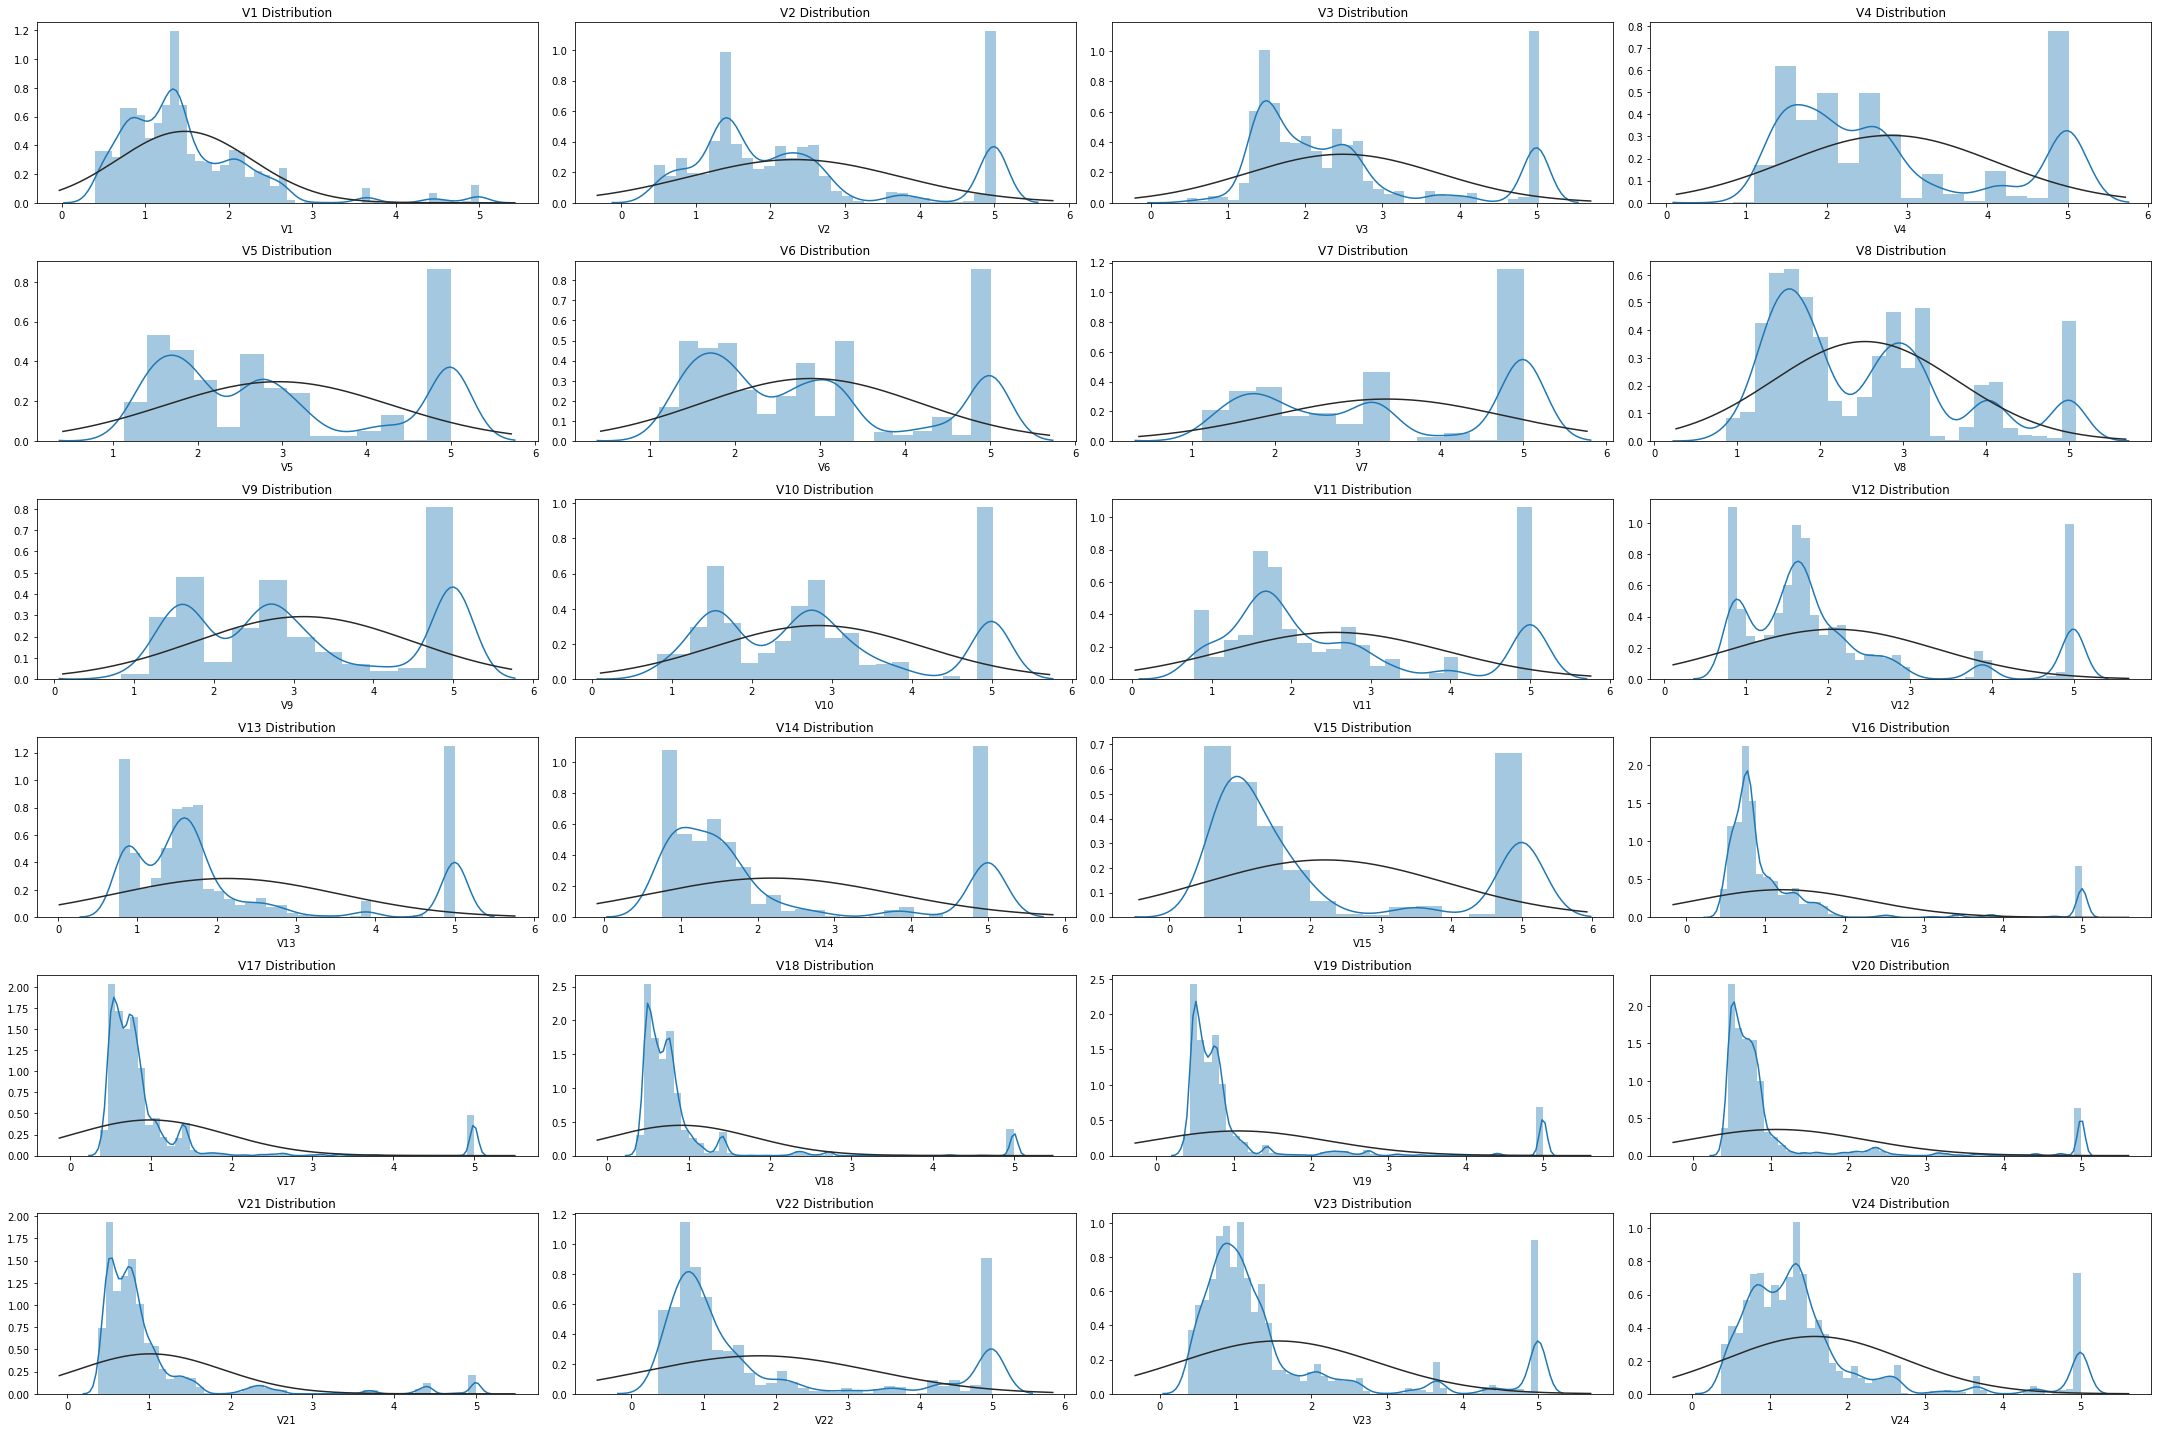

In [8]:
## Plotting the distribution of each sensor
fig = plt.figure(figsize = (30,20))
for i, feature in enumerate(Readings.columns[:-1]):
    ax = fig.add_subplot(6,4,i+1)
    sns.distplot(Readings[feature],fit = norm)
    ax.set_title(feature+' Distribution')
    
fig.tight_layout()
plt.show()
    
    

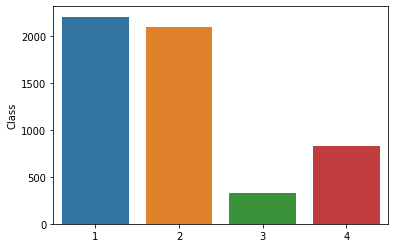

In [9]:
Class_counts = pd.DataFrame(Readings.Class.value_counts())
sns.barplot(Class_counts.index,
            Class_counts.Class);

The class labels are:          
1. Move-Forward        
2. Slight-Right-Turn          
3. Sharp-Right-Turn         
4. Slight-Left-Turn         

As we see that SCITOS G5 rotates in clock wise direction there are more right turns compared to the left in the environment, the above plot matches with the observation we have.

We can see that the classes are imbalenced , lets balance them using RandomOverSampler

In [10]:
feature,target = Readings.drop(columns = 'Class'), Readings.Class

In [11]:
trainX, testX, trainY, testY = train_test_split(feature, target)

## Knn Classifier

In [12]:
pipeline_knn = make_pipeline(RandomOverSampler(),PCA(n_components= 10), KNeighborsClassifier())

In [13]:
pipeline_knn

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [14]:
params_knn = {'pca__n_components':[10,11,12,13,14,15],'kneighborsclassifier__n_neighbors':[5,6,7,8,9]}

In [15]:
rs_knn = RandomizedSearchCV(pipeline_knn, params_knn, cv =5, n_jobs = 3 )

In [16]:
rs_knn.fit(trainX,trainY)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=None,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=10,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                    

In [17]:
rs_knn.best_score_

0.8301564027370479

Training Accuracy : 0.8934506353861192
Testing Accuracy : 0.8401759530791789

CLASSIFICATION REPORT

                   precision    recall  f1-score   support

     Move-Forward       0.87      0.83      0.85       532
Slight-Right-Turn       0.92      0.82      0.86       527
 Sharp-Right-Turn       0.69      0.97      0.81        89
 Slight-Left-Turn       0.72      0.88      0.79       216

         accuracy                           0.84      1364
        macro avg       0.80      0.87      0.83      1364
     weighted avg       0.85      0.84      0.84      1364


CONFUSION MATRIX


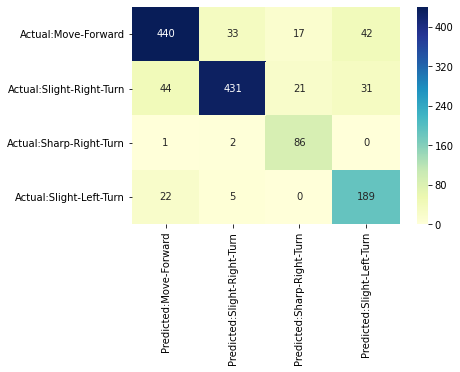

In [18]:
print('Training Accuracy :',rs_knn.score(trainX,trainY))
print('Testing Accuracy :',rs_knn.score(testX,testY))
y_pred = rs_knn.predict(testX)
con_mat = pd.DataFrame(confusion_matrix(y_pred = y_pred, y_true = testY),
            columns = ['Predicted:Move-Forward', 'Predicted:Slight-Right-Turn','Predicted:Sharp-Right-Turn','Predicted:Slight-Left-Turn'],
            index = ['Actual:Move-Forward', 'Actual:Slight-Right-Turn','Actual:Sharp-Right-Turn','Actual:Slight-Left-Turn'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred = y_pred, y_true = testY,
                            target_names =['Move-Forward','Slight-Right-Turn','Sharp-Right-Turn','Slight-Left-Turn']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu");

In [19]:
Comp = {'Knn':rs_knn.score(testX,testY)}

In [20]:
colors = cycle(['aqua','darkorange','cornflowerblue','magenta'])

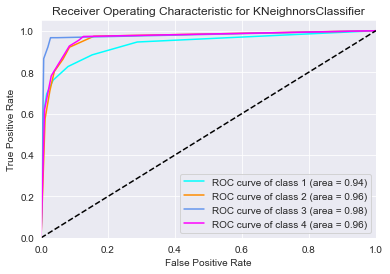

In [21]:
z = label_binarize(testY, classes = [1,2,3,4])
n_classes = z.shape[1]
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
y_score_knn = rs_knn.predict_proba(testX)

for i in range(1,n_classes+1):
    fpr_knn[i],tpr_knn[i],_knn = roc_curve(z[:,i-1],y_score_knn[:,i-1])
    roc_auc_knn[i] = auc(fpr_knn[i],tpr_knn[i])

sns.set_style('darkgrid')
for i,color in zip(range(1,n_classes+1),colors):
    plt.plot(fpr_knn[i],tpr_knn[i],color=color,
            label = 'ROC curve of class {0} (area = {1:0.2f})'.format(i,roc_auc_knn[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNeighnorsClassifier')
plt.legend(loc="lower right")
plt.show()


KNeighborsClassifier is not able to perform well

## Decision Tree

In [22]:
pipeline_dt = make_pipeline(RandomOverSampler(),PCA(n_components =10), DecisionTreeClassifier())

In [23]:
pipeline_dt

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
              

In [24]:
params_dt = {'pca__n_components':[10,11,12,13],
              'decisiontreeclassifier__criterion':['gini','entropy'],
             'decisiontreeclassifier__max_depth':[14,16,18,20]}

In [25]:
rs_dt = RandomizedSearchCV(pipeline_dt, param_distributions = params_dt, cv=5, n_jobs = 4)

In [26]:
rs_dt.fit(trainX,trainY)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=None,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=10,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                    

In [27]:
rs_dt.best_params_

{'pca__n_components': 11,
 'decisiontreeclassifier__max_depth': 18,
 'decisiontreeclassifier__criterion': 'entropy'}

In [28]:
rs_dt.best_score_

0.8049853372434017

Training Accuracy : 0.9951124144672532
Testing Accuracy : 0.8174486803519062

CLASSIFICATION REPORT

                   precision    recall  f1-score   support

     Move-Forward       0.81      0.83      0.82       532
Slight-Right-Turn       0.85      0.86      0.85       527
 Sharp-Right-Turn       0.79      0.78      0.78        89
 Slight-Left-Turn       0.77      0.71      0.74       216

         accuracy                           0.82      1364
        macro avg       0.80      0.79      0.80      1364
     weighted avg       0.82      0.82      0.82      1364


CONFUSION MATRIX



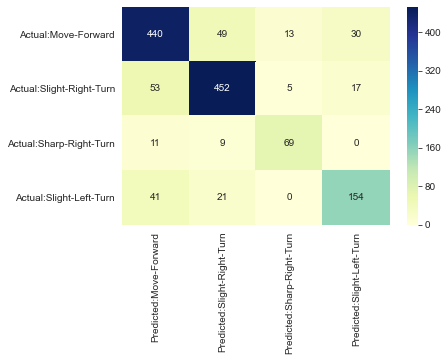

In [29]:
print('Training Accuracy :',rs_dt.score(trainX,trainY))
print('Testing Accuracy :',rs_dt.score(testX,testY))
y_pred = rs_dt.predict(testX)
con_mat = pd.DataFrame(confusion_matrix(y_pred = y_pred, y_true = testY),
            columns = ['Predicted:Move-Forward', 'Predicted:Slight-Right-Turn','Predicted:Sharp-Right-Turn','Predicted:Slight-Left-Turn'],
            index = ['Actual:Move-Forward', 'Actual:Slight-Right-Turn','Actual:Sharp-Right-Turn','Actual:Slight-Left-Turn'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred = y_pred, y_true = testY,
                            target_names =['Move-Forward','Slight-Right-Turn','Sharp-Right-Turn','Slight-Left-Turn']))

print('\nCONFUSION MATRIX\n')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu");

* The DecisionTree is model is over fitting  with the best parameters, lets use plain decision tree model

In [30]:
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(trainX,trainY)
print('Training Accuracy :',dt.score(trainX,trainY))
print('Testing Accuracy :',dt.score(testX,testY))
y_pred = dt.predict(testX)
con_mat = confusion_matrix(y_pred = y_pred, y_true = testY)
print('*'*10,'Confusion Matrix','*'*10)
print(con_mat)

Training Accuracy : 1.0
Testing Accuracy : 0.9956011730205279
********** Confusion Matrix **********
[[529   1   0   2]
 [  0 524   3   0]
 [  0   0  89   0]
 [  0   0   0 216]]


In [31]:
dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(trainX,trainY)
print('Training Accuracy :',dt.score(trainX,trainY))
print('Testing Accuracy :',dt.score(testX,testY))
y_pred = dt.predict(testX)
con_mat = confusion_matrix(y_pred = y_pred, y_true = testY)
print('*'*10,'Confusion Matrix','*'*10)
print(con_mat)

Training Accuracy : 0.9995112414467253
Testing Accuracy : 0.9934017595307918
********** Confusion Matrix **********
[[529   1   0   2]
 [  0 524   3   0]
 [  0   0  89   0]
 [  1   2   0 213]]


In [32]:
top_features = list(Readings.columns[:-1][dt.feature_importances_>0.05])
top_features

['V12', 'V15', 'V18', 'V19', 'V20']

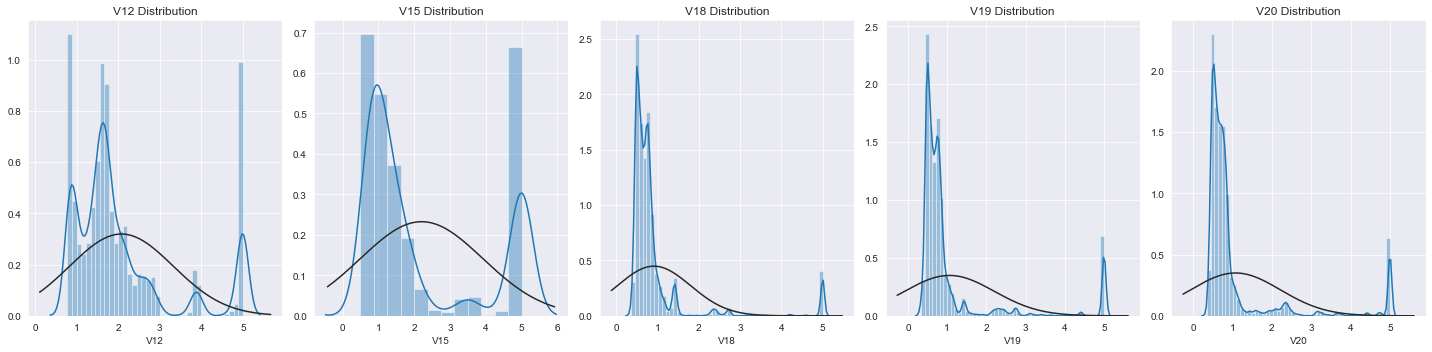

In [33]:
fig = plt.figure(figsize = (20,5))
for i, feature in enumerate(top_features):
    ax = fig.add_subplot(1,5,i+1)
    sns.distplot(Readings[feature],fit = norm)
    ax.set_title(feature+' Distribution')
    
fig.tight_layout()
plt.show()
    
    

Training Accuracy : 0.99
Testing Accuracy : 0.99

CLASSIFICATION REPORT

                   precision    recall  f1-score   support

     Move-Forward       0.98      0.99      0.99       513
Slight-Right-Turn       0.99      0.98      0.98       564
 Sharp-Right-Turn       0.98      0.99      0.98        82
 Slight-Left-Turn       0.99      0.98      0.99       205

         accuracy                           0.99      1364
        macro avg       0.98      0.99      0.98      1364
     weighted avg       0.99      0.99      0.99      1364


CONFUSION MATRIX



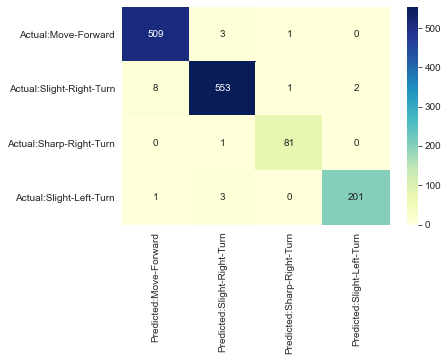

In [34]:
dt = DecisionTreeClassifier(max_depth = 8)
X_train, X_test, Y_train, Y_test = train_test_split(Readings[top_features], Readings.Class)
dt.fit(X_train,Y_train)
print('Training Accuracy :',np.round(dt.score(X_train,Y_train),2))
print('Testing Accuracy :',np.round(dt.score(X_test,Y_test),2))
y_pred = dt.predict(X_test)
con_mat = pd.DataFrame(confusion_matrix(y_pred = y_pred, y_true = Y_test),
            columns = ['Predicted:Move-Forward', 'Predicted:Slight-Right-Turn','Predicted:Sharp-Right-Turn','Predicted:Slight-Left-Turn'],
            index = ['Actual:Move-Forward', 'Actual:Slight-Right-Turn','Actual:Sharp-Right-Turn','Actual:Slight-Left-Turn'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred = y_pred, y_true = Y_test,
                            target_names =['Move-Forward','Slight-Right-Turn','Sharp-Right-Turn','Slight-Left-Turn']))

print('\nCONFUSION MATRIX\n')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu");

Decision Tree is able to get 99 percent accuracy with just 5 features

In [35]:
Comp['Decision_Tree'] = np.round(dt.score(X_test,Y_test),2)

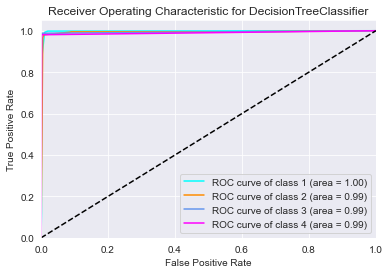

In [46]:
z = label_binarize(Y_test, classes = [1,2,3,4])
n_classes = z.shape[1]
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
y_score_dt = dt.predict_proba(X_test)

for i in range(1,n_classes+1):
    fpr_dt[i],tpr_dt[i],_dt = roc_curve(z[:,i-1],y_score_dt[:,i-1])
    roc_auc_dt[i] = auc(fpr_dt[i],tpr_dt[i])

sns.set_style('darkgrid')
for i,color in zip(range(1,n_classes+1),colors):
    plt.plot(fpr_dt[i],tpr_dt[i],color=color,
            label = 'ROC curve of class {0} (area = {1:0.2f})'.format(i,roc_auc_dt[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for DecisionTreeClassifier')
plt.legend(loc="lower right")
plt.show()


## Logistic Regression

In [47]:
pipeline_lr = make_pipeline(RandomOverSampler(),PCA(n_components=10),LogisticRegression())


In [48]:
pipeline_lr

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

using hyperparameter tuning to find the Best polynomial degree

In [49]:
params_lr = {'pca__n_components':[10,12,14,24]}

In [50]:
rs_lr = RandomizedSearchCV(pipeline_lr,param_distributions=  params_lr, cv = 5, n_jobs = 3 )

In [51]:
rs_lr.fit(trainX,trainY)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=None,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=10,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                    

In [52]:
rs_lr.best_score_

0.6747311827956989

In [53]:
rs_lr.best_params_

{'pca__n_components': 24}

In [54]:
print('Training Accuracy :',rs_lr.score(trainX,trainY))
print('Testing Accuracy :',rs_lr.score(testX,testY))
y_pred = rs_lr.predict(testX)
con_mat = confusion_matrix(y_pred = y_pred, y_true = testY)
print('*'*10,'Confusion Matrix','*'*10)
print(con_mat)

Training Accuracy : 0.6786412512218963
Testing Accuracy : 0.6715542521994134
********** Confusion Matrix **********
[[312  95  44  81]
 [ 56 361  44  66]
 [  0  10  79   0]
 [ 30  19   3 164]]


Since the accuarcy is less lets try using polynomial features to find the best degree of features that is related to the target

In [57]:
for i in range(1,5):
    pol = PolynomialFeatures(degree = i)
    feature_n = pol.fit_transform(Readings.drop(columns = 'Class'))
    X_train,X_test, Y_train, Y_test = train_test_split(feature_n,Readings.Class)
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    print('Training Accuracy for degree :',i,':',lr.score(X_train,Y_train))
    print('Testung Accuracy for degree :',i,':',lr.score(X_test,Y_test))
    y_pred = lr.predict(X_test)
    con_mat = confusion_matrix(y_pred = y_pred, y_true = Y_test)
    print('*'*10,'Confusion Matrix','*'*10)
    print(con_mat)

Training Accuracy for degree : 1 : 0.697702834799609
Testung Accuracy for degree : 1 : 0.6832844574780058
********** Confusion Matrix **********
[[409 142   5  13]
 [ 86 407  12  13]
 [ 17  23  37   0]
 [ 66  52   3  79]]
Training Accuracy for degree : 2 : 0.9699413489736071
Testung Accuracy for degree : 2 : 0.9112903225806451
********** Confusion Matrix **********
[[489  31   8  14]
 [ 22 503   4   2]
 [  6   5  80   0]
 [ 24   4   1 171]]
Training Accuracy for degree : 3 : 0.999266862170088
Testung Accuracy for degree : 3 : 0.9222873900293255
********** Confusion Matrix **********
[[514  24   7  16]
 [ 21 491   6   2]
 [  7   0  75   0]
 [ 20   3   0 178]]
Training Accuracy for degree : 4 : 1.0
Testung Accuracy for degree : 4 : 0.9164222873900293
********** Confusion Matrix **********
[[507  26   4  19]
 [ 28 496   2   5]
 [  3   4  76   0]
 [ 19   4   0 171]]


* We see that Degree2 is best suited with reasonably good accuray

Training Accuracy for degree : 2 : 0.9618768328445748
Testung Accuracy for degree : 2 : 0.9046920821114369

CLASSIFICATION REPORT

                   precision    recall  f1-score   support

     Move-Forward       0.88      0.92      0.90       544
Slight-Right-Turn       0.93      0.90      0.92       546
 Sharp-Right-Turn       0.86      0.89      0.87        89
 Slight-Left-Turn       0.92      0.86      0.89       185

         accuracy                           0.90      1364
        macro avg       0.90      0.89      0.90      1364
     weighted avg       0.91      0.90      0.90      1364


CONFUSION MATRIX



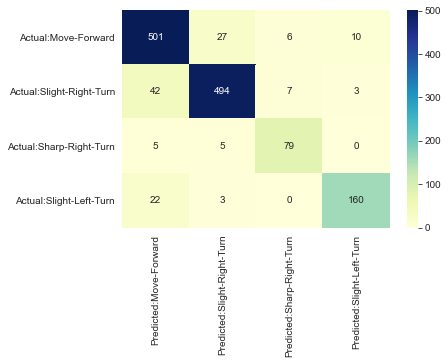

In [58]:
pol = PolynomialFeatures(degree = 2)
feature_n = pol.fit_transform(Readings.drop(columns = 'Class'))
X_train,X_test, Y_train, Y_test = train_test_split(feature_n,Readings.Class)
lr = LogisticRegression()
lr.fit(X_train,Y_train)
print('Training Accuracy for degree :',2,':',lr.score(X_train,Y_train))
print('Testung Accuracy for degree :',2,':',lr.score(X_test,Y_test))
y_pred = lr.predict(X_test)
con_mat = confusion_matrix(y_pred = y_pred, y_true = Y_test)
cm = pd.DataFrame(con_mat,
            columns = ['Predicted:Move-Forward', 'Predicted:Slight-Right-Turn','Predicted:Sharp-Right-Turn','Predicted:Slight-Left-Turn'],
            index = ['Actual:Move-Forward', 'Actual:Slight-Right-Turn','Actual:Sharp-Right-Turn','Actual:Slight-Left-Turn'])

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred = y_pred, y_true = Y_test,
                            target_names =['Move-Forward','Slight-Right-Turn','Sharp-Right-Turn','Slight-Left-Turn']))

print('\nCONFUSION MATRIX\n')
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'YlGnBu');


In [59]:
Comp['Logistic_Regression'] = lr.score(X_test,Y_test)

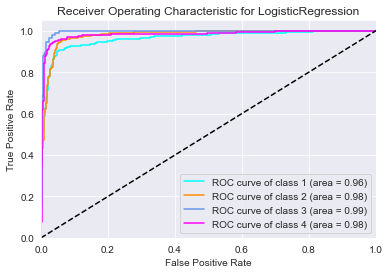

In [61]:
z = label_binarize(Y_test, classes = [1,2,3,4])
n_classes = z.shape[1]
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
y_score_lr = lr.predict_proba(X_test)

for i in range(1,n_classes+1):
    fpr_lr[i],tpr_lr[i],_lr = roc_curve(z[:,i-1],y_score_lr[:,i-1])
    roc_auc_lr[i] = auc(fpr_lr[i],tpr_lr[i])

sns.set_style('darkgrid')
for i,color in zip(range(1,n_classes+1),colors):
    plt.plot(fpr_lr[i],tpr_lr[i],color=color,
            label = 'ROC curve of class {0} (area = {1:0.2f})'.format(i,roc_auc_lr[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LogisticRegression')
plt.legend(loc="lower right")
plt.show()


## RandomForestClassifier

In [62]:
pipeline_rf_pca = make_pipeline(RandomOverSampler(),PCA(n_components=10), RandomForestClassifier())

In [63]:
pipeline_rf_pca

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                          

In [64]:
params_rf_pca = {'pca__n_components':[10,11,12,13,14],
             'randomforestclassifier__max_depth':[10,12,14,16],
            'randomforestclassifier__n_estimators':[500,600,800,1000]}

In [67]:
rs_rf_pca = RandomizedSearchCV(pipeline_rf_pca,params_rf_pca,cv =5, n_jobs =3)

In [68]:
rs_rf_pca.fit(trainX,trainY)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=None,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=10,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                    

In [69]:
rs_rf_pca.best_params_

{'randomforestclassifier__n_estimators': 600,
 'randomforestclassifier__max_depth': 16,
 'pca__n_components': 13}

In [70]:
rs_rf_pca.best_score_

0.8699902248289345

In [71]:
rs_rf_pca.score(testX,testY)

0.8995601173020528

In [72]:
print('Training Accuracy :',rs_rf_pca.score(trainX,trainY))
print('Testing Accuracy :',rs_rf_pca.score(testX,testY))
y_pred = rs_rf_pca.predict(testX)
con_mat = confusion_matrix(y_pred = y_pred, y_true = testY)
print('*'*10,'Confusion Matrix','*'*10)
print(con_mat)

Training Accuracy : 0.998533724340176
Testing Accuracy : 0.8995601173020528
********** Confusion Matrix **********
[[461  40  14  17]
 [ 22 492   5   8]
 [  2   6  81   0]
 [ 17   6   0 193]]


* Without PCA

In [73]:
pipeline_rf = make_pipeline(RandomOverSampler(), RandomForestClassifier())

In [74]:
pipeline_rf

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators='warn', n_jobs=None,
                                        oob_score=False, random_state=None,
       

In [75]:
params_rf = {'randomforestclassifier__max_depth':[10,12,14,16],
            'randomforestclassifier__n_estimators':[500,600,800,1000]}

In [76]:
rs_rf = RandomizedSearchCV(pipeline_rf,params_rf,cv =5, n_jobs =3)

In [77]:
rs_rf.fit(trainX,trainY)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('randomoversampler',
                                              RandomOverSampler(random_state=None,
                                                                ratio=None,
                                                                return_indices=False,
                                                                sampling_strategy='auto')),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     m

In [78]:
rs_rf.best_params_

{'randomforestclassifier__n_estimators': 800,
 'randomforestclassifier__max_depth': 14}

In [79]:
rs_rf.best_score_

0.9938905180840665

In [80]:
rs_rf.score(testX,testY)

0.9904692082111437

In [81]:
print('Training Accuracy :',rs_rf.score(trainX,trainY))
print('Testing Accuracy :',rs_rf.score(testX,testY))
y_pred = rs_rf.predict(testX)
con_mat = confusion_matrix(y_pred = y_pred, y_true = testY)
print('*'*10,'Confusion Matrix','*'*10)
print(con_mat)

Training Accuracy : 1.0
Testing Accuracy : 0.9904692082111437
********** Confusion Matrix **********
[[527   2   0   3]
 [  0 526   1   0]
 [  0   1  88   0]
 [  3   3   0 210]]


* Lets try plain Randmforest Model

In [82]:
pipeline_rf = make_pipeline(RandomOverSampler(), RandomForestClassifier(max_depth =5,n_estimators =500))

In [83]:
pipeline_rf

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=5,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=None,
             

In [88]:
pipeline_rf.fit(trainX,trainY)

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=5,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=None,
             

Training Accuracy : 0.99
Testing Accuracy : 0.98

CLASSIFICATION REPORT

                   precision    recall  f1-score   support

     Move-Forward       0.97      0.98      0.97       532
Slight-Right-Turn       0.99      0.98      0.99       527
 Sharp-Right-Turn       0.95      0.92      0.94        89
 Slight-Left-Turn       0.96      0.97      0.97       216

         accuracy                           0.98      1364
        macro avg       0.97      0.96      0.97      1364
     weighted avg       0.98      0.98      0.98      1364


CONFUSION MATRIX



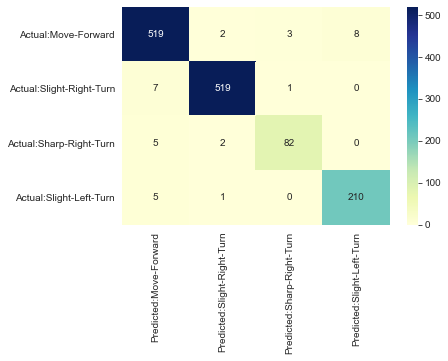

In [89]:
print('Training Accuracy :',np.round(pipeline_rf.score(trainX,trainY),2))
print('Testing Accuracy :',np.round(pipeline_rf.score(testX,testY),2))
y_pred = pipeline_rf.predict(testX)
con_mat = pd.DataFrame(confusion_matrix(y_pred = y_pred, y_true = testY),
            columns = ['Predicted:Move-Forward', 'Predicted:Slight-Right-Turn','Predicted:Sharp-Right-Turn','Predicted:Slight-Left-Turn'],
            index = ['Actual:Move-Forward', 'Actual:Slight-Right-Turn','Actual:Sharp-Right-Turn','Actual:Slight-Left-Turn'])

# print('*'*10,'Confusion Matrix','*'*10)
# plt.figure(figsize= (6,4))
# sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu");
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_pred = y_pred, y_true = testY,
                            target_names =['Move-Forward','Slight-Right-Turn','Sharp-Right-Turn','Slight-Left-Turn']))

print('\nCONFUSION MATRIX\n')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu");

In [90]:
Comp['Random_Forest'] = np.round(pipeline_rf.score(testX,testY),2)

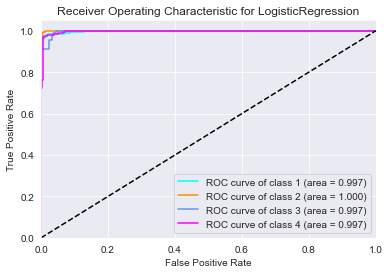

In [97]:
z = label_binarize(testY, classes = [1,2,3,4])
n_classes = z.shape[1]
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
y_score_rf = pipeline_rf.predict_proba(testX)

for i in range(1,n_classes+1):
    fpr_rf[i],tpr_rf[i],_rf = roc_curve(z[:,i-1],y_score_rf[:,i-1])
    roc_auc_rf[i] = auc(fpr_rf[i],tpr_rf[i])

sns.set_style('darkgrid')
for i,color in zip(range(1,n_classes+1),colors):
    plt.plot(fpr_rf[i],tpr_rf[i],color=color,
            label = 'ROC curve of class {0} (area = {1:0.3f})'.format(i,roc_auc_rf[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LogisticRegression')
plt.legend(loc="lower right")
plt.show()


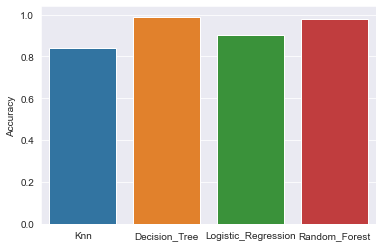

In [98]:
acc = pd.DataFrame.from_dict(Comp,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy);

Basic models of Decision Tree and RandomForest are performing better

## Conclusion
Single layer Neural Network with Short Term Memory (Logistic Perceptron) and Multi Layer Neural Network(Multi Layer Perceptron)
with demands high computation capability.

Machine Learnings models(Decision Tree and RandomForest) require less computing capability than neural networks and performing pretty well.

**Data Source** : https://www.openml.org/d/1497

### Relevant Papers

Ananda L. Freire, Guilherme A. Barreto, Marcus Veloso and Antonio T. Varela (2009), 'Short-Term Memory Mechanisms in Neural Network Learning of Robot Navigation Tasks: A Case Study'. Proceedings of the 6th Latin American Robotics Symposium (LARS'2009), pages 1-6